
# Задача

- [✔️] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [✔️] Считать данные и вывести их основные характеристики, описание признаков.
- [✔]️ Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [✔️] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [✔️] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [✔️] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [✔️] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [156]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Скачиваем данные

In [157]:
# Данные взяты отсюда: https://archive.ics.uci.edu/dataset/2/adult
adult = fetch_ucirepo(id=2) 

### Считываем данные и выводим характеристики

#### Описание данных
Данные представляют собой таблицу `adult`, полученную из базы данных 1994 US Census database. Таблица представляет собой некоторые характеристики человека и его доход за 1994 в бинарном виде (<=50K$ или >50K$).

In [158]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
  
adult_features = adult.data.features 
adult_targets = adult.data.targets 

df = adult_features.merge(adult_targets, left_index=True, right_index=True)

print(df.head())

   age         workclass  fnlwgt  education  education-num      marital-status         occupation   relationship   race     sex  capital-gain  \
0   39         State-gov   77516  Bachelors             13       Never-married       Adm-clerical  Not-in-family  White    Male          2174   
1   50  Self-emp-not-inc   83311  Bachelors             13  Married-civ-spouse    Exec-managerial        Husband  White    Male             0   
2   38           Private  215646    HS-grad              9            Divorced  Handlers-cleaners  Not-in-family  White    Male             0   
3   53           Private  234721       11th              7  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male             0   
4   28           Private  338409  Bachelors             13  Married-civ-spouse     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0  

Признаки и их описание:
- `age` - возраст человека.
- `workclass` - "рабочий" статус человека, принимает значения: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt` - "final weight"; общее количество человек в группе, которую представляет конкретный человек в таблице.
- `education` - образование, принимает значения: Bachelors, Some-college, 11th, HS grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num` - число, однозначно определяющее `education`
- `marital-status` - семейное положение, принимает значения: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation` - род занятий, принимает значения: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship` - тип родственной связи по отношению к другим людям, принимает значения: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race` - раса, принимае значения: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex` - пол, принимает значения: Male, Female.
- `capital-gain` - "прирост капитала", потенциальная прибыль человека после продажи всех его инвестиций, недвижимости и т.д.
- `capital-loss` - "убыток капитала", потенциальный убыток человека после продажи всех его инвестиций, недвижимости и т.д.
- `hours-per-week` - количество рабочих часов в неделю.
- `native-country` - страна, в которой человек родился.
- `income` - годовой доход человека, принимает значения: <=50K, >50K.

#### Описание признаков

In [159]:
print(adult.variables)

              name     role         type      demographic                                        description units missing_values
0              age  Feature      Integer              Age                                                N/A  None             no
1        workclass  Feature  Categorical           Income  Private, Self-emp-not-inc, Self-emp-inc, Feder...  None            yes
2           fnlwgt  Feature      Integer             None                                               None  None             no
3        education  Feature  Categorical  Education Level   Bachelors, Some-college, 11th, HS-grad, Prof-...  None             no
4    education-num  Feature      Integer  Education Level                                               None  None             no
5   marital-status  Feature  Categorical            Other  Married-civ-spouse, Divorced, Never-married, S...  None             no
6       occupation  Feature  Categorical            Other  Tech-support, Craft-repair, Oth

### Задача предсказания
Предсказывать будем `income` по остальным характеристикам.

### Анализ признаков и Data Cleaning

In [160]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

age                              0
workclass                     2799
fnlwgt                           0
education                        0
education-num                    0
marital-status                   0
occupation                    2809
relationship                     0
race                             0
sex                              0
capital-gain                     0
capital-loss                     0
hours-per-week                   0
native-country                 857
income is greater than 50K       0
dtype: int64
income mean=0.23928176569346055


<Axes: xlabel='income is greater than 50K', ylabel='count'>

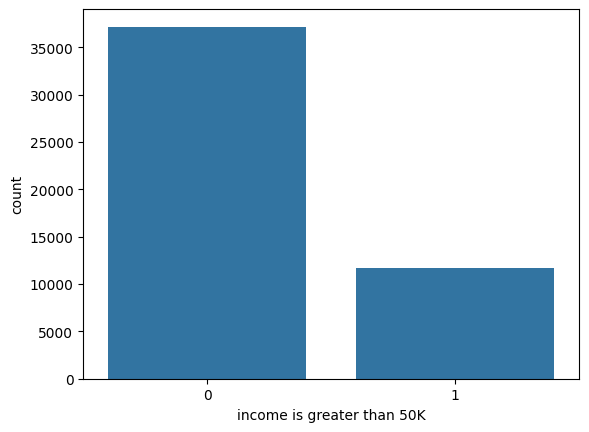

In [161]:
# У некоторых значений в столбце income есть точка в конце, уберем её
df.replace('<=50K.', '<=50K', inplace=True)
df.replace('>50K.', '>50K', inplace=True)
# и заменим `?` в таблице на NaN
df.replace('?', np.NaN, inplace=True)

# И сразу заменим колонку `income` на `income is greater tan 50K` с двумя значениями 1 и 0
income = 'income is greater than 50K'
df.replace('<=50K', 0, inplace=True)
df.replace('>50K', 1, inplace=True)
df.rename(columns={'income' : income}, inplace=True)

print(df.isnull().sum())
print(f'income mean={df[income].mean()}')
sns.countplot(x=income, data=df)

Среди всех людей в этой таблице только у 24% годовой доход выше 50K.
Посмотрим на связь между различными признаками и доходом.

sex     income is greater than 50K
Female  0                             14423
        1                              1769
Male    0                             22732
        1                              9918
Name: income is greater than 50K, dtype: int64


<Axes: xlabel='sex', ylabel='income is greater than 50K'>

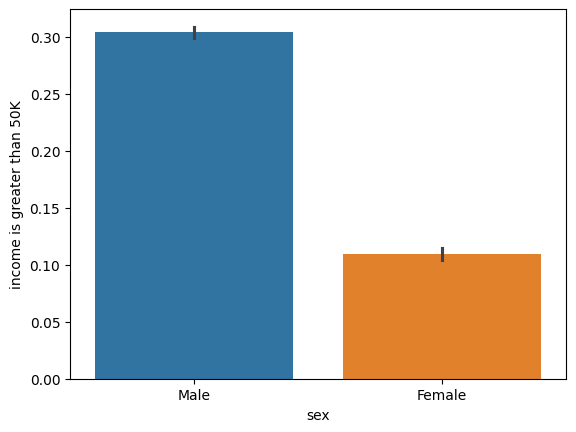

In [162]:
print(df.groupby(['sex', income])[income].count())
sns.barplot(x='sex', y=income, hue='sex', data=df)

Среди всех мужчин 30% имеет доход выше 50K, в то время как среди женщин только 12%.

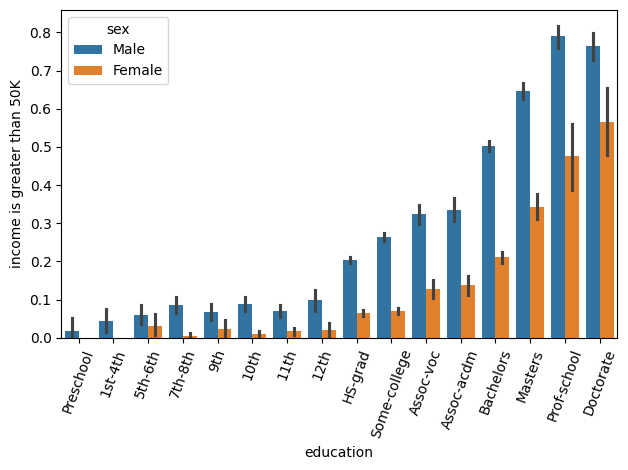

In [163]:
education_order = df.groupby('education')['education-num'].mean().sort_values().index

sns.barplot(x='education', y=income, hue='sex', data=df, order=education_order)
plt.xticks(rotation=70)
plt.tight_layout()

Уже отсюда можно видеть, что чем выше у человека уровень образования, тем больше шанс, что его доход больше 50K в год. При этом то, что процент женщин, имеющих доход >50K, остается ниже процента мужчин и для каждой отдельной категории образования.

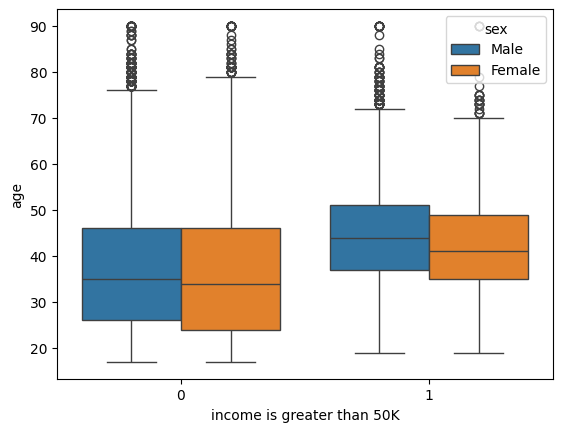

In [164]:
sns.boxplot(data=df, x=income, y='age', hue='sex')
plt.legend(title='sex', loc='upper right')
plt.show()

Отсюда можно видеть, что люди, получающие >50K в среднем старше и это выполняется как для мужчин, так и для женщин.

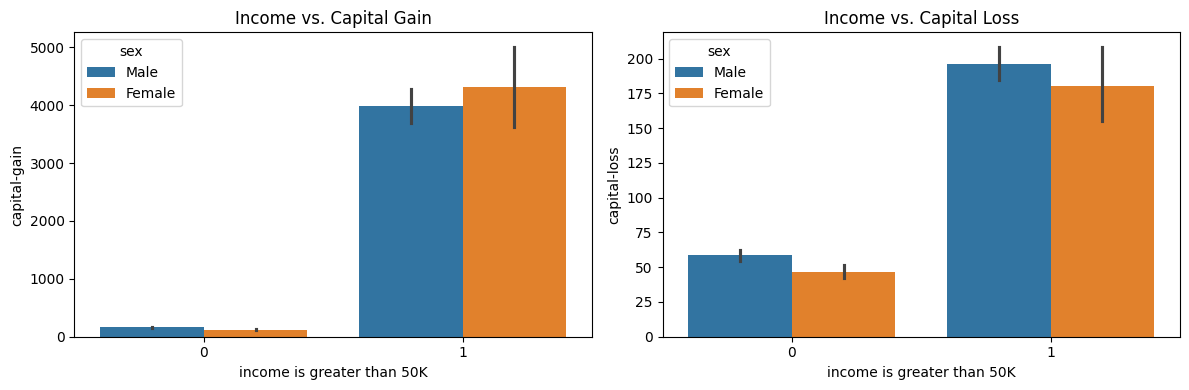

In [165]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=df, x=income, y='capital-gain', hue='sex', ax=ax1)

ax1.set_title('Income vs. Capital Gain')

sns.barplot(data=df, x=income, y='capital-loss', hue='sex', ax=ax2)

ax2.set_title('Income vs. Capital Loss')

plt.tight_layout()
plt.show()

Довольно ожидаемая корреляция между capital-gain, сapital-loss и доходом человека. Хочется думать, что это следствие того, что у людей с меньшим доходом чаще нет инвестиций/имущества. 

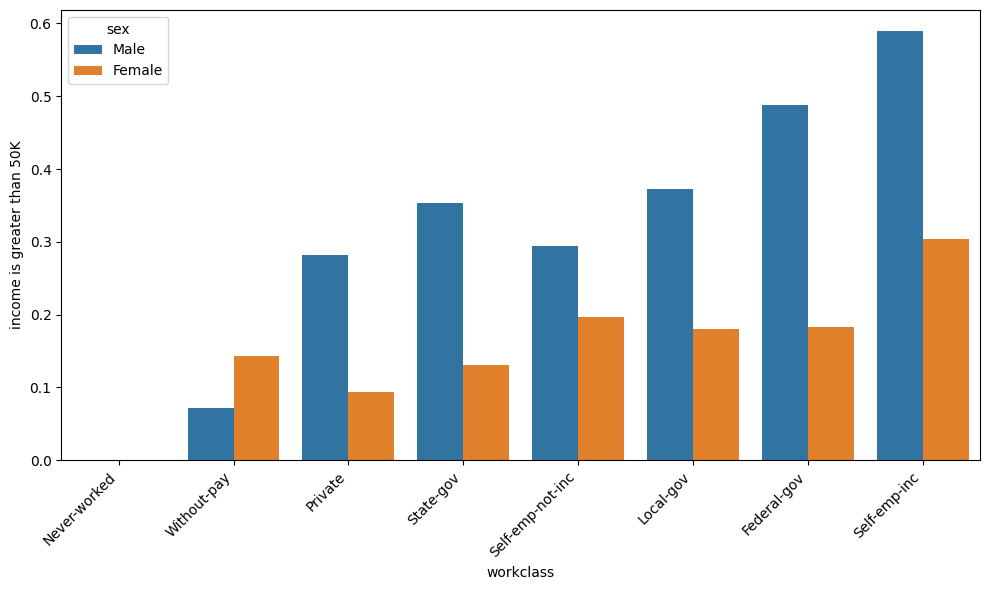

In [166]:
order = df.groupby('workclass')[income].mean().sort_values(ascending=True).index

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='workclass', y=income, hue='sex', errorbar=None, order=order)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Люди, работающие на себя в среднем чаще зарабатывают больше 50K, чем все остальные.

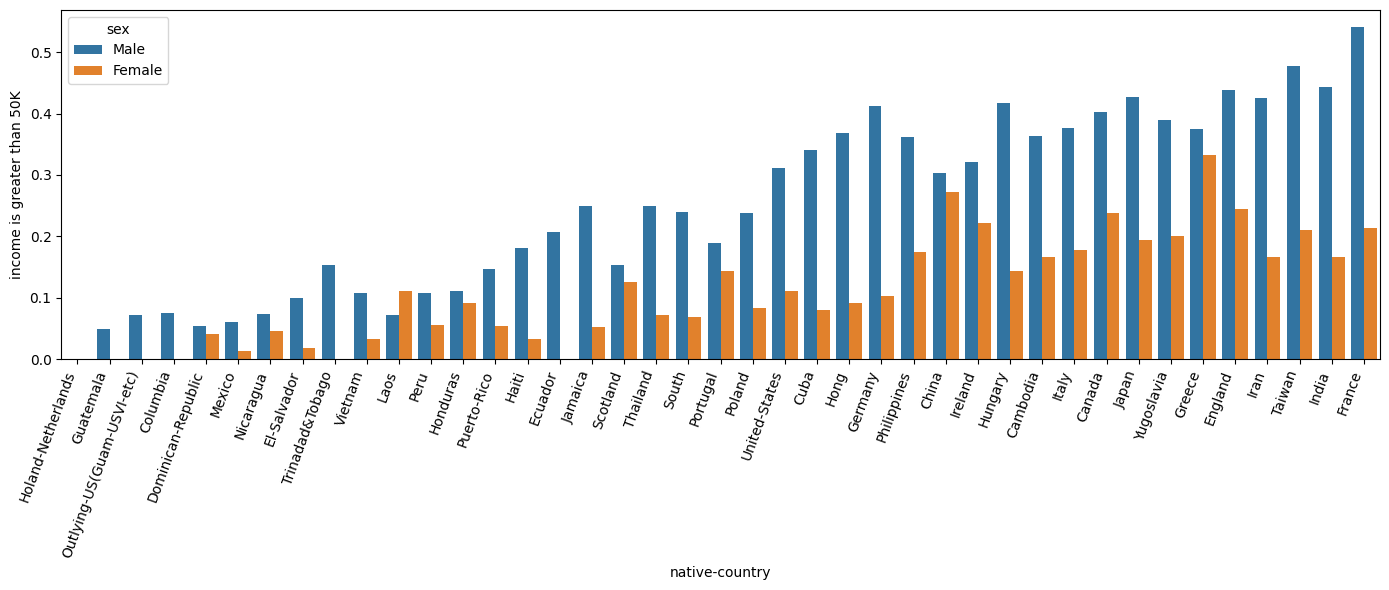

In [167]:
plt.figure(figsize=(14, 6))
order = df.groupby('native-country')[income].mean().sort_values(ascending=True).index
sns.barplot(x='native-country', y=income, hue='sex', errorbar=None, data=df, order=order)
plt.xticks(rotation=70, ha='right')
plt.tight_layout()

Восстановим NULLы. Сначала посмотим, почему количество нуллов в `workclass` и `occupation` не совпадает.

In [168]:
condition = (~df['workclass'].isna()) & df['occupation'].isna()
rows_with_nan = df[condition]
print(rows_with_nan)

       age     workclass  fnlwgt     education  education-num         marital-status occupation    relationship   race     sex  capital-gain  \
5361    18  Never-worked  206359          10th              6          Never-married        NaN       Own-child  White    Male             0   
10845   23  Never-worked  188535       7th-8th              4               Divorced        NaN   Not-in-family  White    Male             0   
14772   17  Never-worked  237272          10th              6          Never-married        NaN       Own-child  White    Male             0   
20337   18  Never-worked  157131          11th              7          Never-married        NaN       Own-child  White  Female             0   
23232   20  Never-worked  462294  Some-college             10          Never-married        NaN       Own-child  Black    Male             0   
32304   30  Never-worked  176673       HS-grad              9     Married-civ-spouse        NaN            Wife  Black  Female          

Дело в "Never-worked", ведь у безработных нет рода занятий?

In [169]:
print(rows_with_nan.equals(df[df['workclass'] == 'Never-worked']))

True


Заменим нуллы на строку "None".

In [170]:
df.loc[df['workclass'] == 'Never-worked', 'occupation'] = 'None'
print(df.isnull().sum())

age                              0
workclass                     2799
fnlwgt                           0
education                        0
education-num                    0
marital-status                   0
occupation                    2799
relationship                     0
race                             0
sex                              0
capital-gain                     0
capital-loss                     0
hours-per-week                   0
native-country                 857
income is greater than 50K       0
dtype: int64


In [171]:
print(f"rows number: {len(df.index)}")
print(f"rows with NaNs number: {df.isna().any(axis=1).sum()}")

rows number: 48842
rows with NaNs number: 3610


Строк с `NaN` значениями меньше, чем 10% от всей выборки (и при этом в выборке 48842 строки) и кажется, что их никак осмысленно не восстановить (лучше моды вряд ли что-то придумать можно, и мода будет довольно плохой), поэтому думаю, что лучшем решением является просто их выкинуть.

In [172]:
df.dropna(inplace=True)

### Feature engineering

- Колонка `fnlwgt` не показывает ничего важного для нашей задачи, а только как-то характеризует то, как данные собирались, её стоит удалить.
- Колонка `education` дублирует колонку `education-num`, её стоит удалить и оставить только числовой вариант для обучения.
- Колонки `relationship` и `marital-status` несут довольно похожую информацию, скорее всего достаточно будет оставить только одну из них.

Кажется, что у одного человека прибыль (`capital-gain`) и убыток (`capital-loss`) не могут быть положительными одновременно, потому что они характеризуют одну и ту же величину. Проверим это.

In [173]:
print(df[(df['capital-loss'] > 0) & (df['capital-gain'] > 0)])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income is greater than 50K]
Index: []


Таких строк нет, как и предполагалось, эти две колонки можно объединить в одну `capital-diff`, вычисляющуюся как `capital-gain` - `capital-loss`. Удалим ненужные колонки, и выделим новую `capital-diff`.

In [174]:
df.drop(['fnlwgt', 'education', 'relationship'], axis=1, inplace=True)

df['capital-diff'] = df['capital-gain'] - df['capital-loss']
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

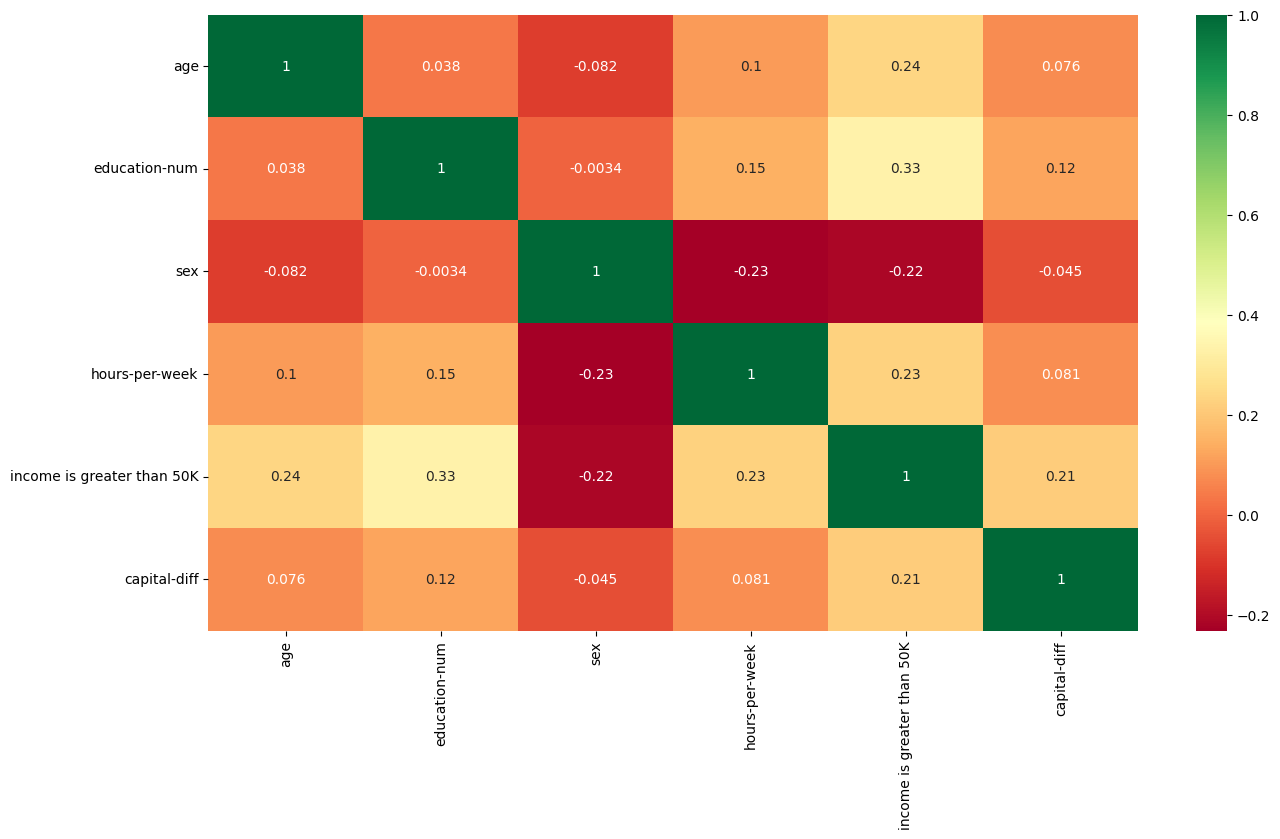

In [175]:
# Удалим все колонки со строками, заменим в `sex` строки на числа и посмтроим heatmap
df.drop(['workclass', 'marital-status', 'occupation', 'race', 'native-country'], axis=1, inplace=True)
df.replace({'sex' : {'Male' : 0, 'Female' : 1}}, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

Между никакими двумя признаками нет корреляции.